 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
# YOUR CODE HERE
whale_returns_csv = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [190]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.isnull().sum() / len(whale_df) * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
# YOUR CODE HERE
algo_returns_csv = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull()
algo_df.isnull().sum() / len(algo_df) * 100

Algo 1    0.0
Algo 2    0.0
dtype: float64

In [192]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df.isnull().sum() / len(algo_df) * 100

Algo 1    0.0
Algo 2    0.0
dtype: float64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
# YOUR CODE HERE
sp500_history_csv = Path("Resources/sp500_history.csv")
sp_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df.sort_index(inplace=True)
sp_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
# YOUR CODE HERE
sp_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# YOUR CODE HERE
sp_df["Close"] = sp_df["Close"].str.replace("$", "")
sp_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
sp_df["Close"] = sp_df["Close"].astype("float")
sp_df.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns = sp_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
# YOUR CODE HERE
daily_returns.dropna(inplace=True)
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename Column
# YOUR CODE HERE
sp_df = daily_returns.rename(columns={"Close": "S&P500"})
sp_df.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df, algo_df, sp_df], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

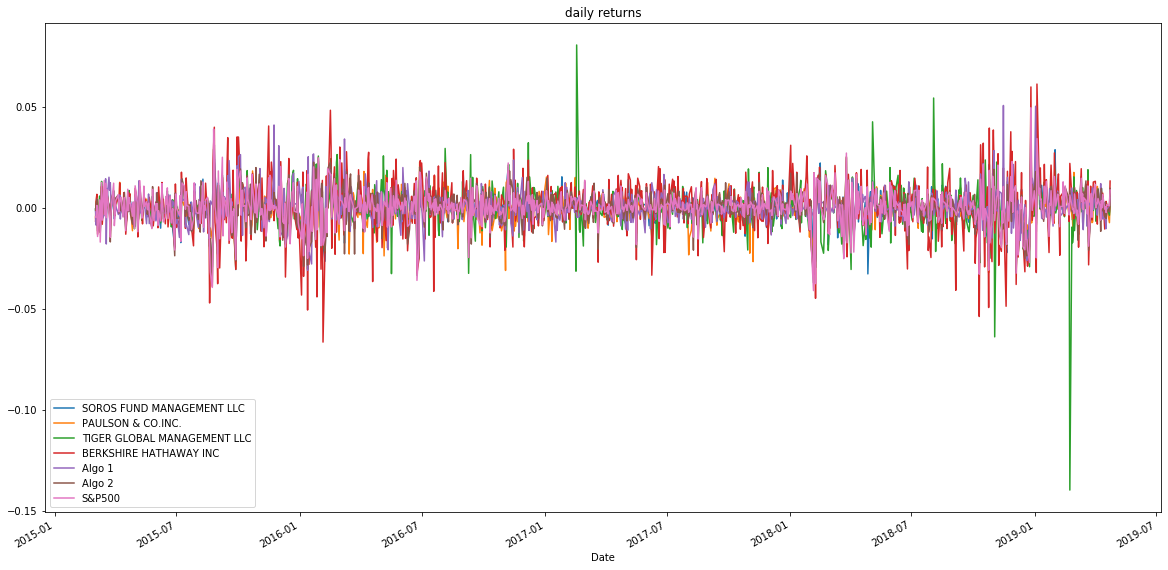

In [197]:
# Plot daily returns
# YOUR CODE HERE

combined_df.plot(figsize=(20,10), title="daily returns")

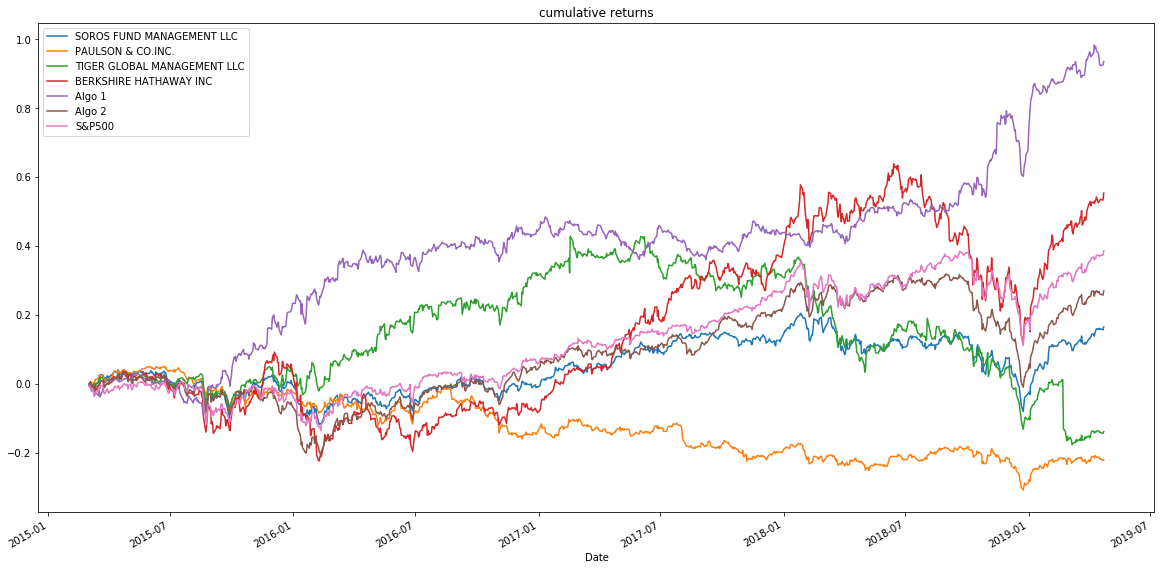

In [198]:
# Plot cumulative returns
# YOUR CODE HERE
cum_returns = (1 + combined_df).cumprod() - 1
cum_returns.plot(figsize=(20,10), title="cumulative returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

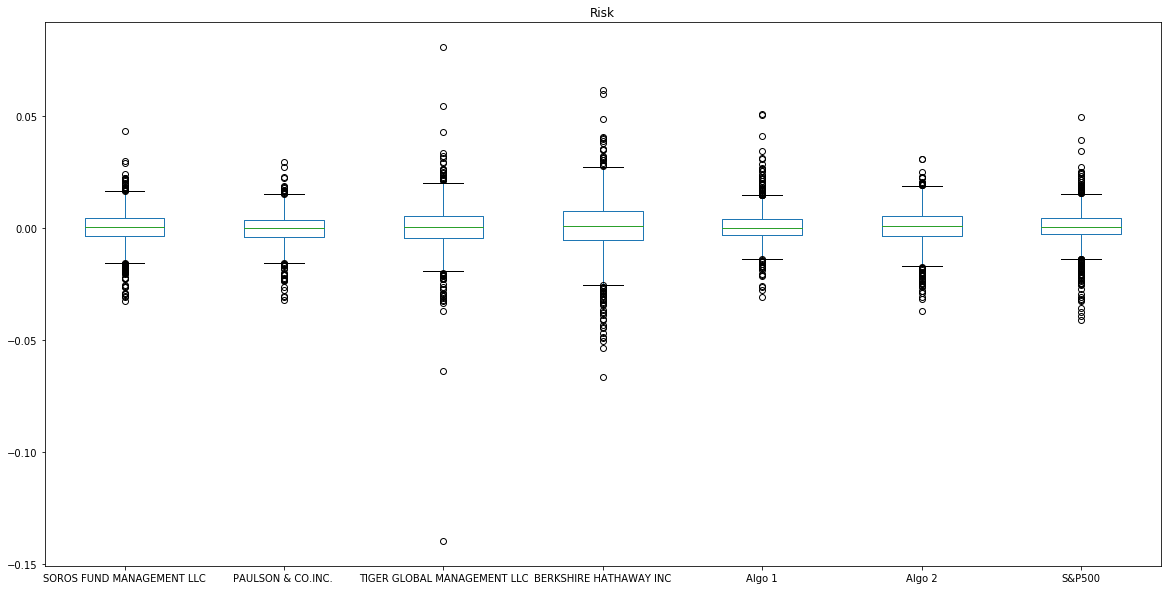

In [199]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot.box(figsize=(20,10), title="Risk")

In [200]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

In [201]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

daily_std > daily_std["S&P500"]


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

In [202]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std 

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

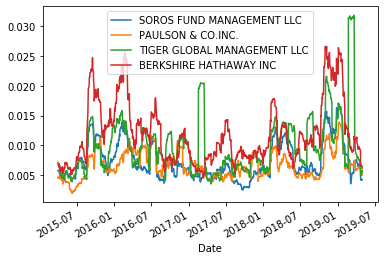

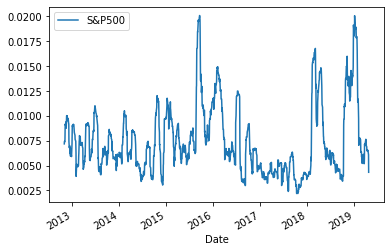

In [203]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
rolling_sd_whale = whale_df.rolling(window=21).std().plot()
rolling_sd_sp500 = sp_df.rolling(window=21).std().plot()


In [204]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [205]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

covariance = combined_df["Algo 1"].rolling(window=60).cov(combined_df["S&P500"])
variance = combined_df["S&P500"].rolling(window=60).var()
print(covariance)
print(variance)

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000001
2019-04-17    0.000003
2019-04-18    0.000003
2019-04-22    0.000003
2019-04-23    0.000003
Length: 1043, dtype: float64
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P500, Length: 1043, dtype: float64


In [206]:
algo_1_beta = covariance/variance
algo_1_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
Length: 1043, dtype: float64

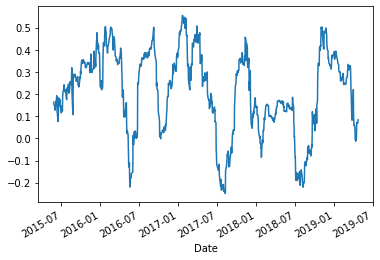

In [207]:
(covariance/variance).plot() 

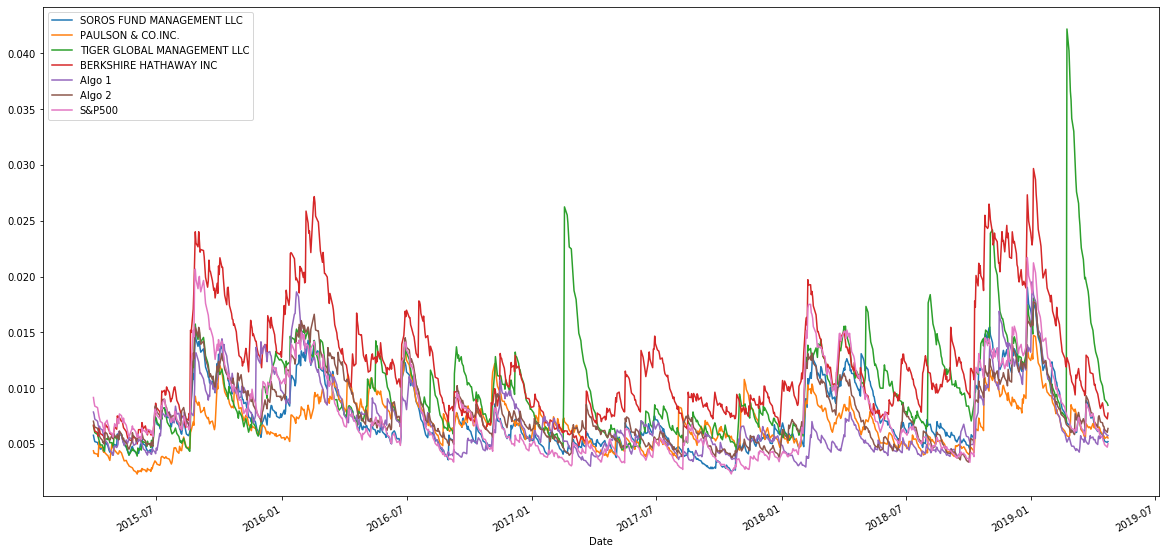

In [208]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
ewm_pd = combined_df.ewm(span=21, min_periods=21).std()
ewm_pd.plot(figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [55]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

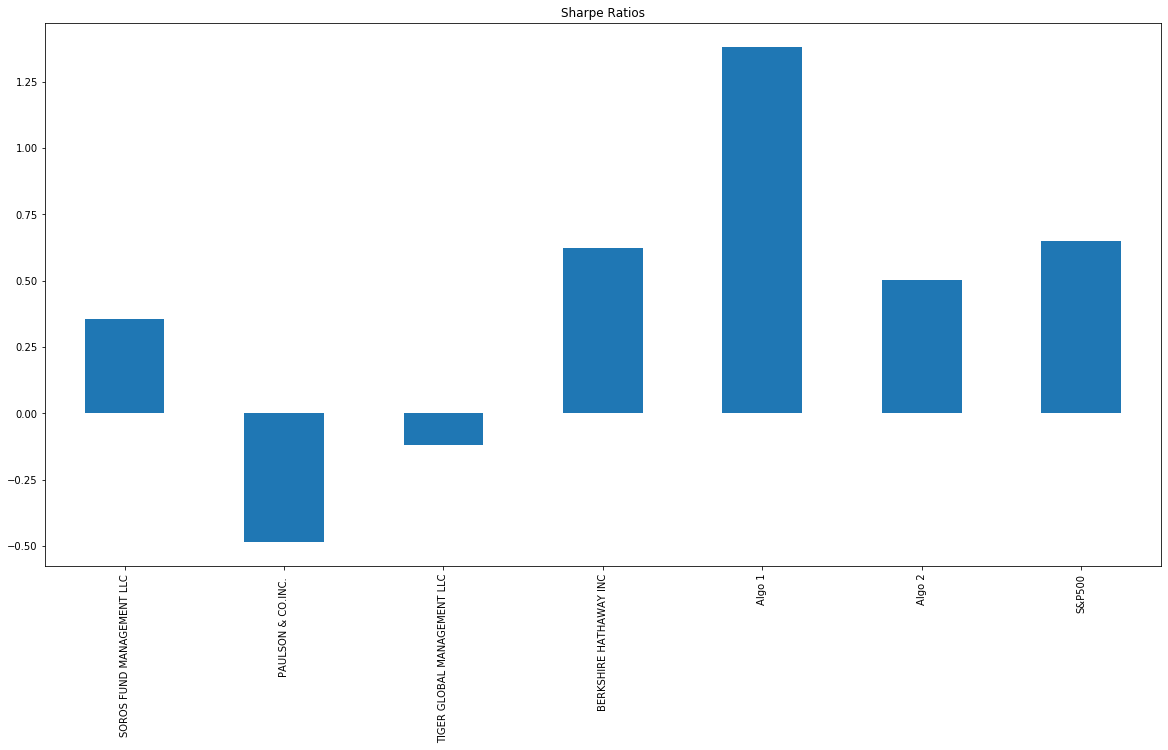

In [57]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", figsize=(20,10), title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [156]:
# Read the first stock
# YOUR CODE HERE
csvpath1 = Path('SQ .csv')
sq_df = pd.read_csv(csvpath1, index_col="Date", infer_datetime_format=True, parse_dates=True)
sq_df.head()

,Close
Date,
2017-02-13,14.50
2017-02-14,14.33
2017-02-15,14.31
2017-02-16,13.89
2017-02-17,14.47


In [157]:
# Read the second stock
# YOUR CODE HERE
csvpath2 = Path('PYPL.csv')
pypl_df = pd.read_csv(csvpath2, index_col="Date", infer_datetime_format=True, parse_dates=True)
pypl_df.head()

,Close
Date,
2017-02-13,41.17
2017-02-14,41.62
2017-02-15,41.87
2017-02-16,42.15
2017-02-17,41.96


In [158]:
# Read the third stock
# YOUR CODE HERE
csvpath3 = Path('AXP.csv')
axp_df = pd.read_csv(csvpath3, index_col="Date", infer_datetime_format=True, parse_dates=True)
pypl_df.head()

,Close
Date,
2017-02-13,41.17
2017-02-14,41.62
2017-02-15,41.87
2017-02-16,42.15
2017-02-17,41.96


In [159]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
lidia_df = pd.concat([sq_df, pypl_df, axp_df], axis="columns", join="inner") 
lidia_df.head()

,Close,Close,Close
Date,,,
2017-02-13,14.50,41.17,78.91
2017-02-14,14.33,41.62,79.41
2017-02-15,14.31,41.87,79.60
2017-02-16,13.89,42.15,79.51
2017-02-17,14.47,41.96,79.71


In [160]:
# Reset the index
# YOUR CODE HERE
lidia_df.sort_index(inplace=True)
lidia_df.head()

,Close,Close,Close
Date,,,
2017-02-13,14.50,41.17,78.91
2017-02-14,14.33,41.62,79.41
2017-02-15,14.31,41.87,79.60
2017-02-16,13.89,42.15,79.51
2017-02-17,14.47,41.96,79.71


In [161]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
columns = ["SQ", "PYPL", "AXP"]
lidia_df.columns = columns 
lidia_df.head()

,SQ,PYPL,AXP
Date,,,
2017-02-13,14.50,41.17,78.91
2017-02-14,14.33,41.62,79.41
2017-02-15,14.31,41.87,79.60
2017-02-16,13.89,42.15,79.51
2017-02-17,14.47,41.96,79.71


In [162]:
# Drop Nulls
# YOUR CODE HERE
lidia_df.dropna(inplace=True)
lidia_df.count()

SQ      858
PYPL    858
AXP     858
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [211]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
daily_returns = lidia_df.pct_change()
portfolio_returns= daily_returns.dot(weights)
portfolio_returns = pd.DataFrame(portfolio_returns)

portfolio_returns.columns=["Lidia"]
portfolio_returns.head()

,Lidia
Date,
2017-02-13,NaN
2017-02-14,0.001847
2017-02-15,0.002335
2017-02-16,-0.007931
2017-02-17,0.013255


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [212]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

joint_returns_df = pd.concat([combined_df, portfolio_returns], axis="columns", join="inner")
joint_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Lidia
Date,,,,,,,,
2017-02-13,0.000000,0.000000,0.000000,0.000000,0.000377,0.001755,0.005246,NaN
2017-02-14,0.004076,0.009487,0.002747,0.001473,-0.002242,0.004304,0.004007,0.001847
2017-02-15,0.002789,0.015100,0.004363,0.010385,0.000417,0.004890,0.004992,0.002335
2017-02-16,-0.005058,-0.005727,-0.031373,-0.001463,0.004644,-0.001863,-0.000864,-0.007931
2017-02-17,0.005239,0.001365,0.080705,-0.004561,-0.004738,0.000581,0.001679,0.013255
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000223
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.001789
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.007999


In [213]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
joint_returns_df.dropna()
joint_returns_df.count()

SOROS FUND MANAGEMENT LLC      551
PAULSON & CO.INC.              551
TIGER GLOBAL MANAGEMENT LLC    551
BERKSHIRE HATHAWAY INC         551
Algo 1                         551
Algo 2                         551
S&P500                         551
Lidia                          550
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [214]:
# Risk
# YOUR CODE HERE
joint_returns_df.std()
annualized_joint_std = joint_returns_df * np.sqrt(252)
annualized_joint_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Lidia
Date,,,,,,,,
2017-02-13,0.000000,0.000000,0.000000,0.000000,0.005982,0.027860,0.083276,NaN
2017-02-14,0.064703,0.150609,0.043612,0.023376,-0.035588,0.068322,0.063614,0.029328
2017-02-15,0.044274,0.239703,0.069268,0.164853,0.006620,0.077625,0.079251,0.037060
2017-02-16,-0.080292,-0.090911,-0.498024,-0.023229,0.073728,-0.029576,-0.013717,-0.125903
2017-02-17,0.083163,0.021671,1.281145,-0.072408,-0.075208,0.009230,0.026647,0.210413


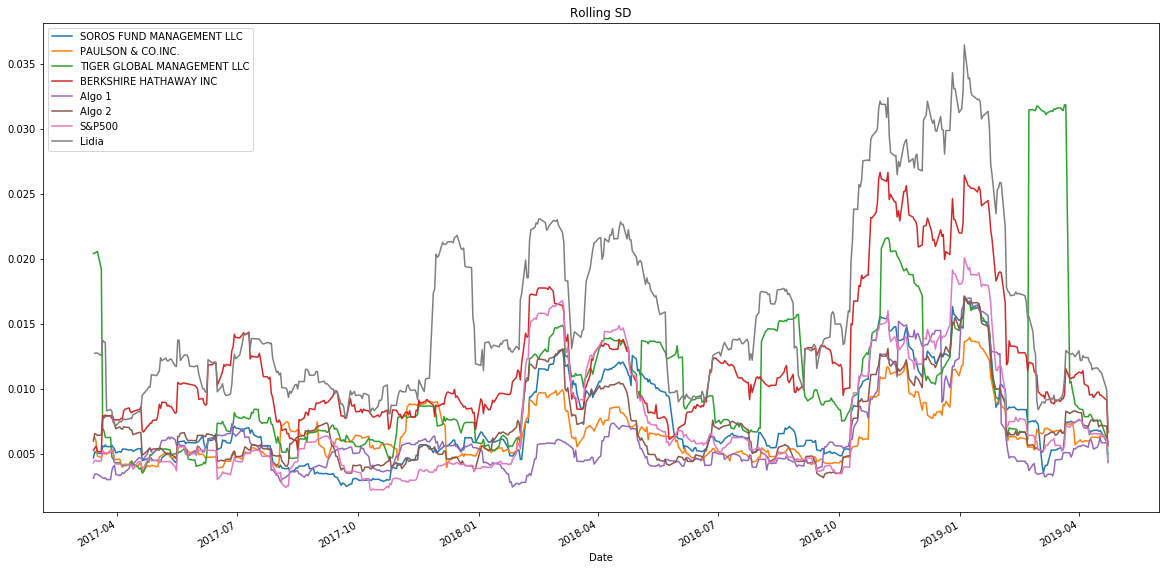

In [215]:
# Rolling
# YOUR CODE HERE
rolling_sd_joint_returns_df = joint_returns_df.rolling(window=21).std().plot(figsize=(20,10), title="Rolling SD")

In [216]:
# Annualized Sharpe Ratios

sharpe_ratios_joint= (joint_returns_df.mean() * 252) / (joint_returns_df.std() * np.sqrt(252))

sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

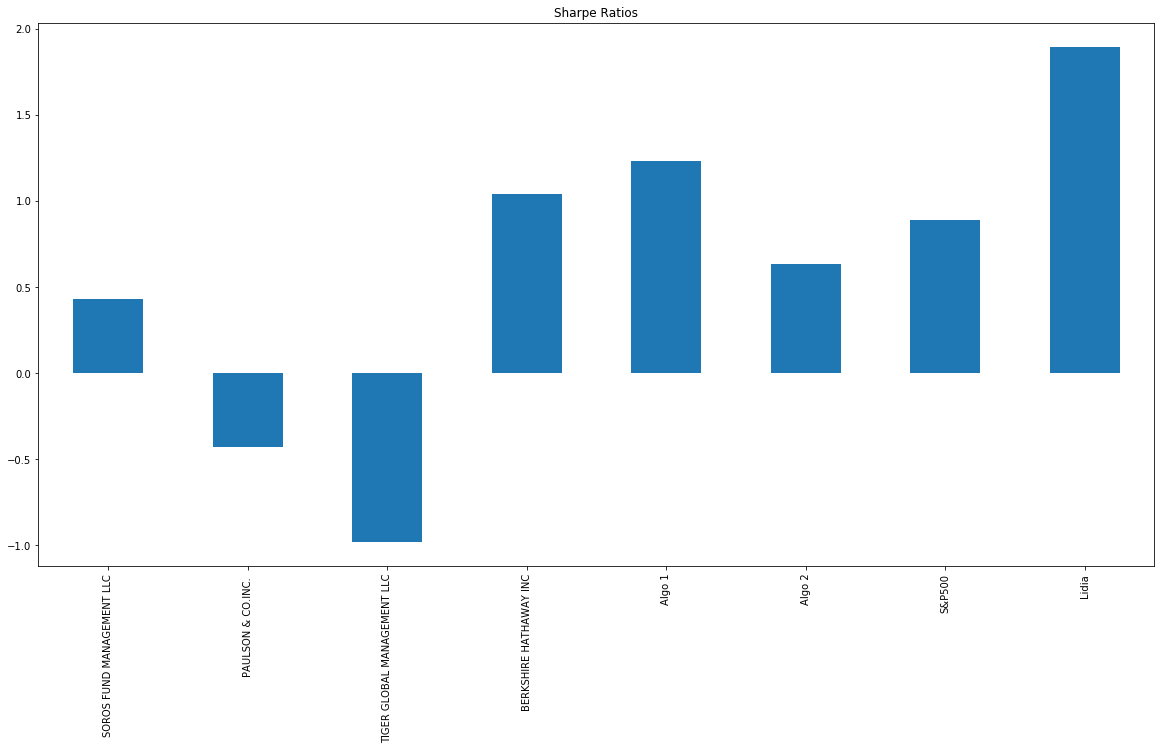

In [217]:
# Visualize the sharpe ratios as a bar plot


sharpe_ratios_joint.plot(kind="bar", figsize=(20,10), title="Sharpe Ratios")

In [218]:
# Create a correlation analysis
# YOUR CODE HERE
correlation_joint = joint_returns_df.corr()
correlation.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494


In [223]:
# Beta
# YOUR CODE HERE

covariance_joint = joint_returns_df["Lidia"].rolling(window=60).cov(joint_returns_df["S&P500"])
variance_joint = joint_returns_df["S&P500"].rolling(window=60).var()

sq_beta = covariance/variance
sq_beta.plot(figsize=(20,10), title="SQ Beta")